In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import scipy.cluster.hierarchy as shc

In [48]:
df = pd.read_csv("s1_modified.csv")
ds = df.copy()

In [4]:
df.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [20]:
from sklearn.cluster import DBSCAN

In [21]:
df = df.head(1000)

In [22]:
sca = preprocessing.StandardScaler()

In [23]:
df = sca.fit_transform(df)

In [24]:
df = pd.DataFrame(df)

In [25]:
df.head()

,0,1
0,0.240454,-0.107338
1,0.250691,-0.070907
2,-0.166271,0.020305
3,-0.036171,-0.104743
4,0.067596,0.189036


In [26]:
df.isnull().sum()

0    0
1    0
dtype: int64

In [27]:
df.columns = ["x", "y"]

In [28]:
df

,x,y
0,0.240454,-0.107338
1,0.250691,-0.070907
2,-0.166271,0.020305
3,-0.036171,-0.104743
4,0.067596,0.189036
...,...,...
995,1.173704,0.833698
996,1.336834,0.577981
997,1.347490,0.766803
998,1.026809,0.793550


In [29]:
db = DBSCAN(eps = 0.3, min_samples = 50, metric = 'euclidean').fit(df)

In [30]:
db

DBSCAN(eps=0.3, min_samples=50)

In [31]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

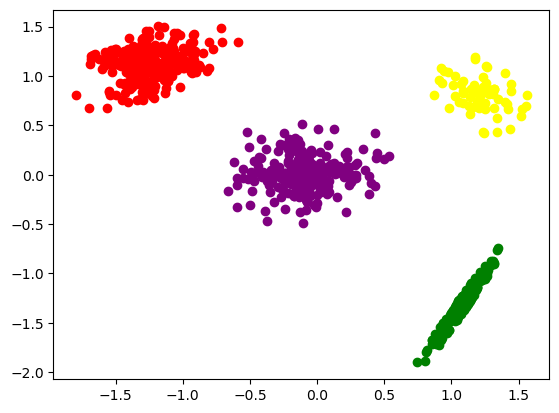

In [41]:
X0 = df[db.labels_ == 0]
plt.scatter(X0.iloc[:, 0], X0.iloc[:, 1], c = 'purple')
X1 = df[db.labels_ == 1]
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c = 'green')
X2 = df[db.labels_ == 2]
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c = 'red')
X3 = df[db.labels_ == 3]
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c = 'yellow')

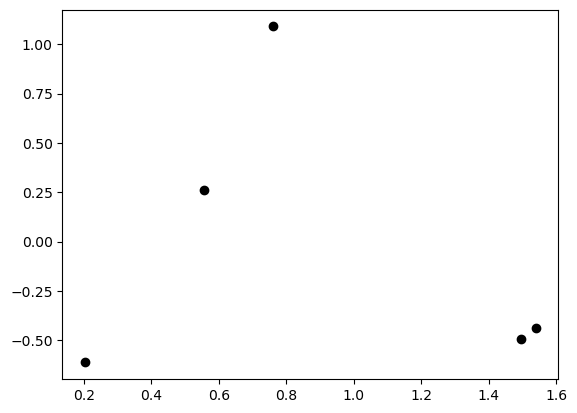

In [43]:
X4 = df[db.labels_ == -1]
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c = "black")

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
ds = sca.fit_transform(ds)

In [51]:
ds = pd.DataFrame(ds)

In [52]:
ds.head()

,0,1
0,0.610459,0.238476
1,0.617356,0.268240
2,0.336422,0.342760
3,0.424079,0.240596
4,0.493993,0.480612


In [53]:
ds.columns = ["x", "y"]

In [54]:
ds = ds.head(1000)

In [55]:
ds.head()

,x,y
0,0.610459,0.238476
1,0.617356,0.268240
2,0.336422,0.342760
3,0.424079,0.240596
4,0.493993,0.480612


In [56]:
plt.figure(figsize = (8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

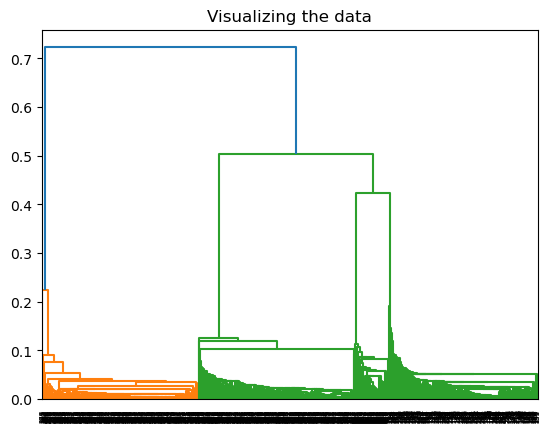

In [60]:
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(ds, method = "single"))

In [63]:
ac = AgglomerativeClustering(n_clusters = 2, linkage = "single")

In [64]:
plt.figure(figsize = (6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

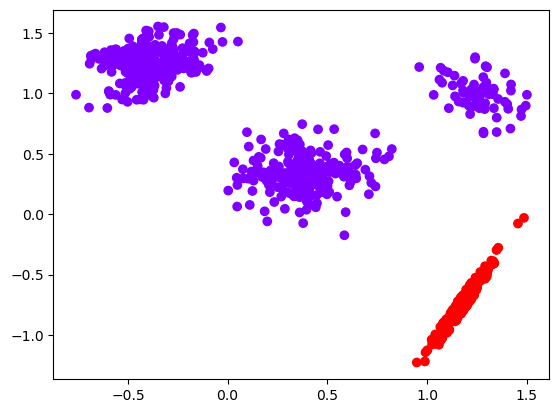

In [66]:
plt.scatter(ds["x"], ds["y"], c = ac.fit_predict(ds), cmap = "rainbow")

In [67]:
plt.show()

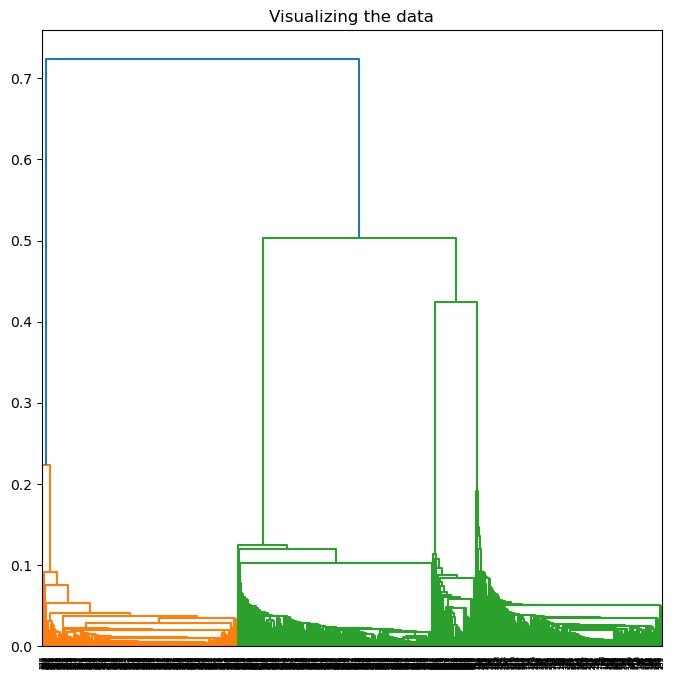

In [68]:
plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(ds, method = "single"))

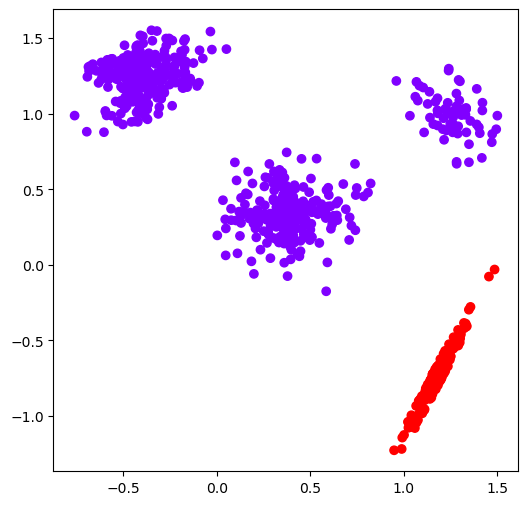

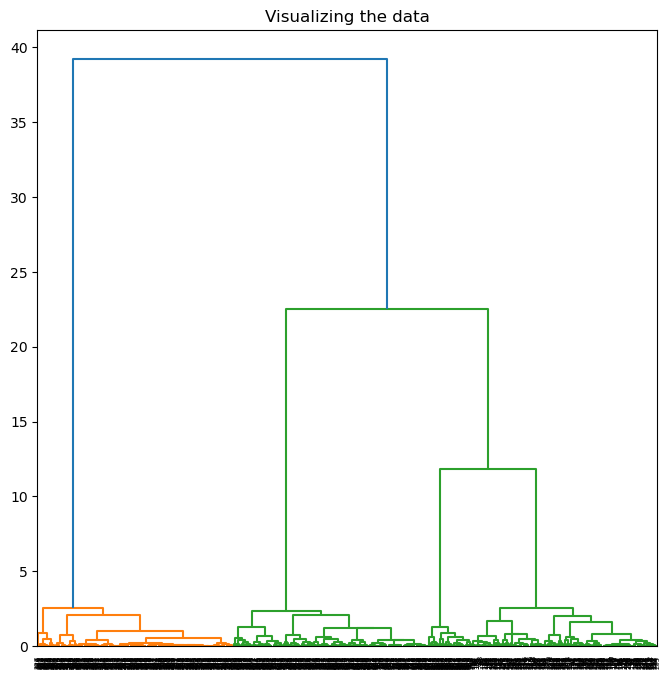

In [69]:
ac = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
plt.figure(figsize = (6, 6))
plt.scatter(ds["x"], ds["y"], c = ac.fit_predict(ds), cmap = "rainbow")

plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(ds, method = "ward"))

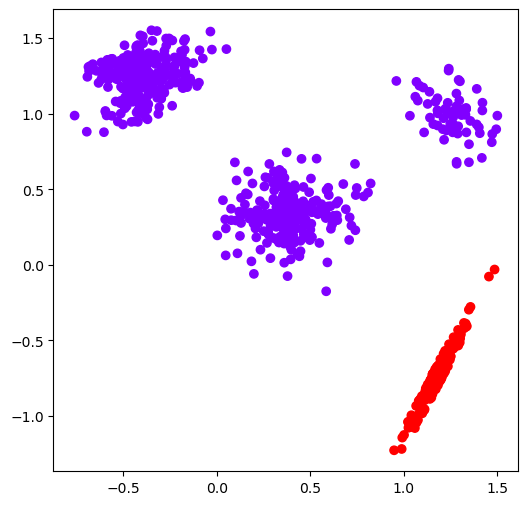

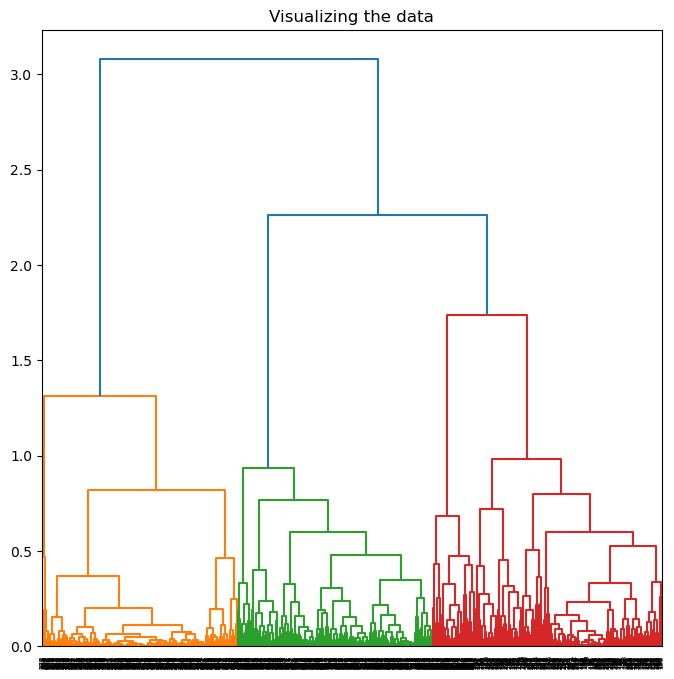

In [70]:
ac = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
plt.figure(figsize = (6, 6))
plt.scatter(ds["x"], ds["y"], c = ac.fit_predict(ds), cmap = "rainbow")

plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(ds, method = "complete"))